<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [595]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [640]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [641]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [642]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [643]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [644]:
movies[movies.duration == movies.duration.agg('min')]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [645]:
movies[movies.duration == movies.duration.agg('max')]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

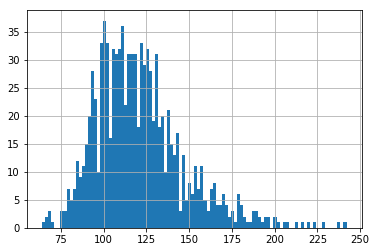

In [646]:
# Answer:
movies.duration.hist(bins=100);

# large number of bins to demonstrate uneveness of the data

#### Use a box plot to display that same data.

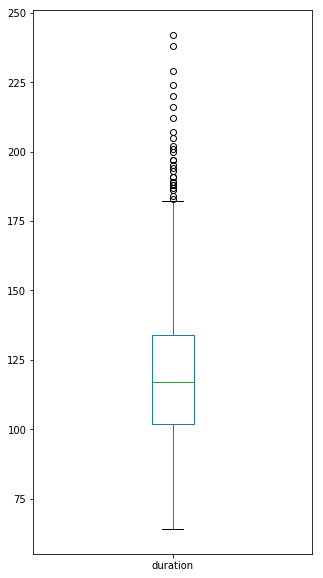

In [647]:
# Answer:
movies.duration.plot(kind='box', figsize=(5,10));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [648]:
# Answer:
movies.content_rating.value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

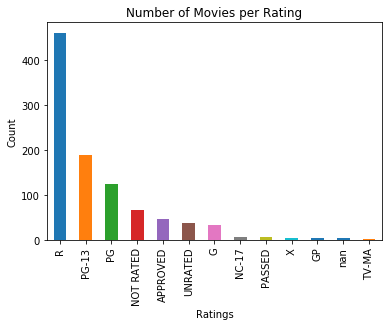

In [649]:
# Answer:

ax = movies.content_rating.value_counts(dropna=False).plot.bar()
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
ax.set_title('Number of Movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [650]:
movies.content_rating.value_counts()
def new_rating(row):
    if df.loc[count, 'content_rating'] in ['NOT RATED', 'APPROVED', 'PASSED', 'GP']:
            df.loc[count, 'content_rating'] = 'UNRATED'



R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [635]:
# Answer:

# Use apply

def new_rating(df):
    count = 0
    for el in df.content_rating:
        if df.loc[count, 'content_rating'] in ['NOT RATED', 'APPROVED', 'PASSED', 'GP']:
            df.loc[count, 'content_rating'] = 'UNRATED'
        count += 1

In [636]:
new_rating(movies)

In [637]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [103]:
# Answer:

def adult_rating(df):
    count = 0
    for el in df.content_rating:
        if df.loc[count, 'content_rating'] in ['X', 'TV-MA']:
            df.loc[count, 'content_rating'] = 'NC-17'
        count += 1

In [106]:
adult_rating(movies)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [108]:
# Answer:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [116]:
sum(movies.star_rating.isnull())

0

In [118]:
sum(movies.title.isnull())

0

In [119]:
sum(movies.content_rating.isnull())

3

In [121]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [126]:
sum(movies.genre.isnull())

0

In [128]:
sum(movies.duration.isnull())

0

In [131]:
sum(movies.actors_list.isnull())

0

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [132]:
# Answer:
movies.content_rating.fillna(value = 'UNRATED')

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

In [133]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [138]:
# Answer:
movies[movies.duration > 120].star_rating.mean()

7.953669724770622

In [139]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

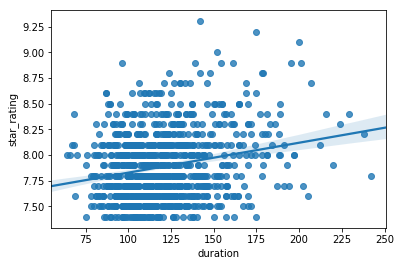

In [147]:
sns.regplot(data=movies, x='duration', y='star_rating');

In [148]:
movies.duration.corr(movies.star_rating)

0.22714918343059212

#### Calculate the average duration for each genre.

In [151]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [349]:
genre_list = list(set(list(movies.genre.values)))

In [166]:
movies[movies.genre == 'Thriller'].genre

350    Thriller
496    Thriller
728    Thriller
848    Thriller
902    Thriller
Name: genre, dtype: object

In [170]:
for item in genre_list:
    print(f'Av. duration for {item} is:', round(movies[movies.genre == item].duration.mean()))

Av. duration for Western is: 137
Av. duration for Thriller is: 114
Av. duration for Crime is: 122
Av. duration for Biography is: 132
Av. duration for Sci-Fi is: 109
Av. duration for Action is: 126
Av. duration for History is: 66
Av. duration for Drama is: 127
Av. duration for Comedy is: 108
Av. duration for Family is: 108
Av. duration for Mystery is: 116
Av. duration for Adventure is: 135
Av. duration for Animation is: 97
Av. duration for Fantasy is: 112
Av. duration for Film-Noir is: 97
Av. duration for Horror is: 103


## Advanced level

#### Visualize the relationship between content rating and duration.

In [174]:
# Answer:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

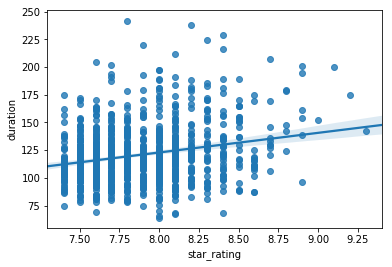

In [178]:
sns.regplot(data=movies, x='star_rating', y='duration');

#### Determine the top rated movie (by star rating) for each genre.

In [181]:
genre_list

['Western',
 'Thriller',
 'Crime',
 'Biography',
 'Sci-Fi',
 'Action',
 'History',
 'Drama',
 'Comedy',
 'Family',
 'Mystery',
 'Adventure',
 'Animation',
 'Fantasy',
 'Film-Noir',
 'Horror']

In [222]:
rating = movies[movies.genre == 'Horror'].star_rating.sort_values().tail(1).values[0]
rating

8.6

In [220]:
movie = movies[(movies.genre == 'Horror') & (movies.star_rating == 8.6)].title.values[0]
movie

'Psycho'

In [224]:
for item in genre_list:
    rating = movies[movies.genre == item].star_rating.sort_values().tail(1).values[0]
    movie = movies[(movies.genre == item) & (movies.star_rating == rating)].title.values[0]
    print(f"The top rated {item} movie is {movie}, and it's rated {rating}")

The top rated Western movie is The Good, the Bad and the Ugly, and it's rated 8.9
The top rated Thriller movie is Shadow of a Doubt, and it's rated 8.0
The top rated Crime movie is The Shawshank Redemption, and it's rated 9.3
The top rated Biography movie is Schindler's List, and it's rated 8.9
The top rated Sci-Fi movie is Blade Runner, and it's rated 8.2
The top rated Action movie is The Dark Knight, and it's rated 9.0
The top rated History movie is Battleship Potemkin, and it's rated 8.0
The top rated Drama movie is 12 Angry Men, and it's rated 8.9
The top rated Comedy movie is Life Is Beautiful, and it's rated 8.6
The top rated Family movie is E.T. the Extra-Terrestrial, and it's rated 7.9
The top rated Mystery movie is Rear Window, and it's rated 8.6
The top rated Adventure movie is The Lord of the Rings: The Return of the King, and it's rated 8.9
The top rated Animation movie is Spirited Away, and it's rated 8.6
The top rated Fantasy movie is The City of Lost Children, and it's r

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [276]:
# Answer
#movies.title.value_counts() > 1

first = movies.title[0]
first = 'True Grit'
first

'True Grit'

In [277]:
movies[movies.title == first].title.value_counts().values[0]

2

In [301]:
multi_movies = []
for movie in movies.title:
    if movies[movies.title == movie].title.value_counts().values[0] > 1:
        multi_movies.append(movie)
        
multi_movies = set(multi_movies)
multi_movies

{'Dracula', 'Les Miserables', 'The Girl with the Dragon Tattoo', 'True Grit'}

In [302]:
movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


In [303]:
# let's assume that the best way to tell if two entries are duplicates is if they have the same title and actors 
dup_movies = []
for movie in multi_movies:
    if movies[movies.title == movie].actors_list.values[0] == movies[movies.title == movie].actors_list.values[1]:
        dup_movies.append(movie)

dup_movies
# No dupes

[]

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [406]:
# determine relevant genres
movies.groupby('genre').title.count() > 10

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: title, dtype: bool

In [407]:
# manually create a list of the relevant genres
big_genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']

In [594]:
# filter and determine the mean
movies[movies.genre.isin(big_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [593]:
counts = movies.groupby('genre').title.count()
ratings = movies.groupby('genre').star_rating.mean()

ratings[counts > 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [444]:
# This is practically how I answered #2 above, but here the ratings are filtered by a boolean series instead
ratings = movies.groupby('genre').star_rating.mean()
relevant = movies.groupby('genre').title.count() > 10

ratings[relevant]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [540]:
# Answer:

values = movies.groupby('genre').star_rating.agg(['count', 'mean'])
values[values['count'] > 10]['mean']

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

#### Figure out something "interesting" using the actors data!

In [586]:
# Goal: determine actor with most roles
# 1. Convert actors_list from list of strings to list of lists

from ast import literal_eval
actors = movies.actors_list.apply(literal_eval)

In [591]:
# 3. Convert list to DataFrame and run .value_counts()

indiv_df = pd.DataFrame(individuals)
indiv_df['names'] = indiv_df
indiv_df.names.value_counts()

Robert De Niro                    18
Tom Hanks                         14
Clint Eastwood                    14
Brad Pitt                         14
Al Pacino                         13
Johnny Depp                       12
Christian Bale                    11
Leonardo DiCaprio                 11
Dustin Hoffman                    11
Denzel Washington                 10
James Stewart                     10
Harrison Ford                     10
Julianne Moore                    10
Jack Nicholson                     9
Sean Connery                       9
Russell Crowe                      9
Ed Harris                          9
Ethan Hawke                        9
Ian McKellen                       8
Cary Grant                         8
Sean Penn                          8
Tom Cruise                         8
Jake Gyllenhaal                    8
Bruce Willis                       8
Michael Caine                      8
Matt Damon                         8
Robert Downey Jr.                  8
K